# <font color='blue'>**Критерий перестановок**</font> 

Ирисы Фишера - "чашка Петри" Статистики. Мы тоже посмотрим - насколько "изменится букет ирисов" при их **перестановках**

# <font color='blue'>0. Импорт необходимых модулей</font>  

In [67]:
# Матрицы да таблицы
import numpy as np
import pandas as pd

# Рисование
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Статистика
import scipy.stats as stats

# Перестановки
import random

# <font color='blue'>1. Ирисы! </font>  

Загружаем датасеты 

In [13]:
from sklearn import datasets

iris = datasets.load_iris()

Подробная информация о датасете - https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

Загруженные данные - это словарь с информацией об ирисах:

In [14]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

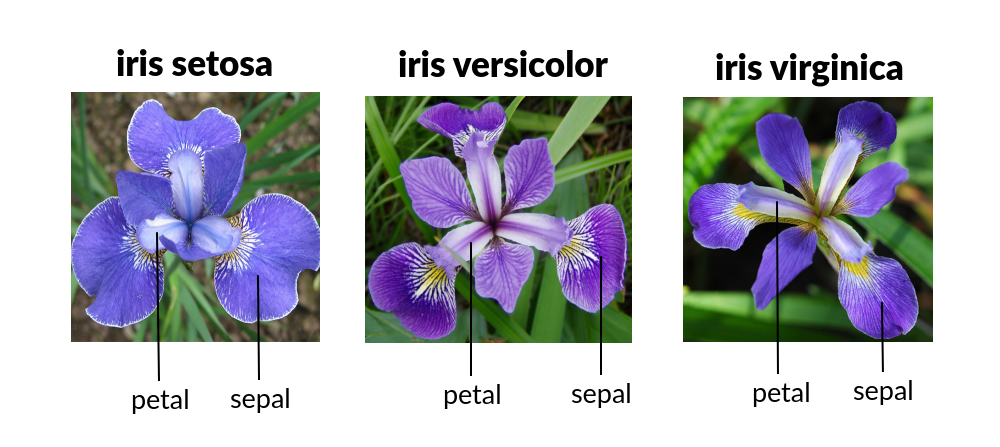

Данные хранятся в таблице "data"

Смысл её столбцов (информация для ботаников):

1. Длина наружной доли околоцветника (англ. sepal length);
2. Ширина наружной доли околоцветника (англ. sepal width);
3. Длина внутренней доли околоцветника (англ. petal length);
4. Ширина внутренней доли околоцветника (англ. petal width);

In [23]:
iris_df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

Есть 3 вида ириса:

0. Ирис щетинистый (Iris setosa)
1.  Ирис разноцветный (Iris versicolor)
2. Ирис виргинский (Iris virginica)

In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Добавим столбец с видом ириса. 



In [34]:
iris_df['species'] = iris.target
iris_df.species = iris_df.species.apply(lambda x: iris.target_names[x])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Посмотрим на матрицу ковариационную матрицу (scatter matrix) для данных 

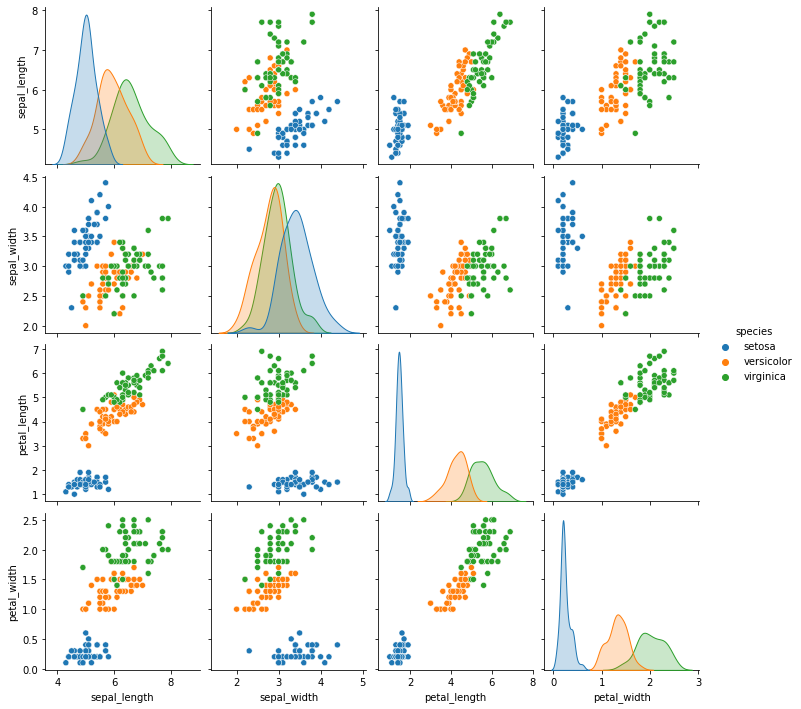

In [35]:
sns.pairplot(iris_df, hue="species")
plt.show()

Ирисы достаточно неплохо кластеризуются

# <font color='blue'>2. Тест перестановок </font> 

Давайте посмотрим на первый столбик для двух видов цветочков:

In [40]:
#Versicolor:
sep_len_ver = iris_df.sepal_length.[np.where(iris_df.species[:]=='versicolor')[0]]
#Virginica:
sep_len_vir = iris_df.sepal_length[np.where(iris_df.species[:]=='virginica')[0]]

Получили 2 списка:

In [42]:
sep_len_ver.head()

50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
Name: sepal_length, dtype: float64

## 2.1 Выбираем метрику. Вычисляем разницу значений 2ух выборок

Возьмём **среднее значение**. Можно брать медиану, персентили и т.д.

Пусть выборки - $X_i$ и $Y_j$, вычисляем $$ \tau = \left| \bar{X} - \bar{Y} \right|$$


In [45]:
gT = np.abs(np.mean(sep_len_ver) - np.mean(sep_len_vir))
print(f'Разница средних {gT}')

Разница средних 0.6519999999999984


## 2.2 Переставляем значения и считаем ту же метрику

Смотрим - сколько элементов в списках

In [53]:
n_vir, n_ver = len(sep_len_vir),  len(sep_len_ver)
print(f'В двух списках одинаковое число элементов: {n_vir} на {n_ver}')

В двух списках одинаковое число элементов: 50 на 50


Собираем данные в один список

In [54]:
pL = list(sep_len_vir) + list(sep_len_ver)
assert len(pL) == n_vir + n_ver

Рассматриваем перестановки R.

Переставляем данные, обозначим новые выборки за $X_R$ и $Y_R$.

Вычисляем для них новые значения взятой метрики:$$ \tau_R = \left| \bar{X_R} - \bar{Y_R} \right|$$

In [77]:
#Список для сохранения разностей
pD = []
#Количество перестановок:
pN=10000
#Основной цикл
for i in range(0,pN):
    #Переставляем данные:
    random.shuffle(pL)
    #Вычисляем разность средних, сохраняем в pD
    pD.append(np.abs(np.mean(pL[0:n_vir]) - np.mean(pL[n_vir:])))

Перестановок берите - сколько сможете запустить. 

## 2.3 Вычислем p-value (доля перестановок, для которых разность ещё больше)

In [78]:
p_val = len(np.where(pD>=gT)[0])/pN
print(f'p-value {p_val}')

p-value 0.0


## 2.4 Строим графики

*   Построим гистограмму
*   Нарисуем её гладкую аппроксимацию при помощи 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.gaussian_kde.html

*   Отметим p-value





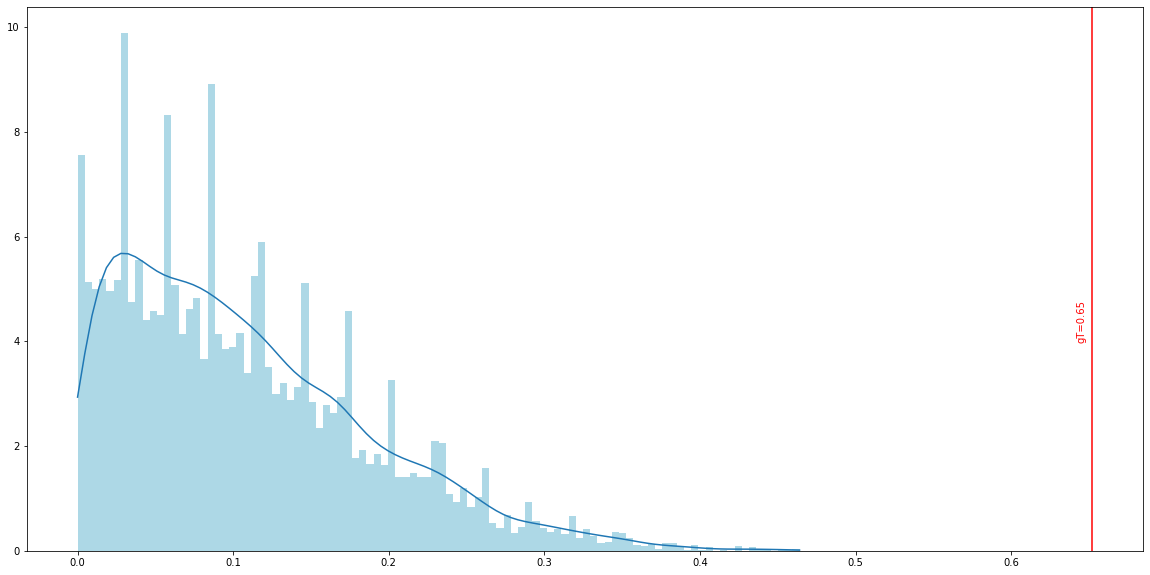

In [79]:
plt.figure(figsize=(20,10))
# Гистограмма 
n, x, _ = plt.hist(pD, 100, density=True, color='lightblue')
# Строим гладкую аппроксимацию
density = stats.gaussian_kde(pD)
plt.plot(x, density(x))
# p-value
plt.axvline(x=gT, color='red')
plt.text(gT-0.01,4,f'gT={gT:.2f}',color='red', rotation=90)
plt.show()

# <font color='blue'>Сильно отличаются ириски! p-value = 0! </font> 